In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
import numpy as np

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
IMAGE_SIZE=256
CHANNEL=3

train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10
)

train_datagen = train_datagen.flow_from_directory(
    '../dataset/train',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse',
)

Found 5303 images belonging to 5 classes.


In [3]:
class_names = list(train_datagen.class_indices.keys())
class_names

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_healthy']

In [4]:
for image_batch, label_batch in train_datagen:
    print(image_batch[0].shape)
    break

(256, 256, 3)


In [5]:
val_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10
)

val_datagen = val_datagen.flow_from_directory(
    '../dataset/val',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse',
)

Found 756 images belonging to 5 classes.


In [6]:
test_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10
)

test_datagen = test_datagen.flow_from_directory(
    '../dataset/test',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode='sparse',
)

Found 1520 images belonging to 5 classes.


In [7]:
input_shape = (IMAGE_SIZE,IMAGE_SIZE,CHANNEL)
n_classes = 5

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32,(3,3), activation='relu', input_shape= input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),

])


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [9]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [10]:
1506/32, 215/32

(47.0625, 6.71875)

In [11]:
history = model.fit(
    train_datagen,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=val_datagen,
    validation_steps=6,
    verbose=1,
    epochs=20
)

Epoch 1/20
47/47 [==============================] - 155s 3s/step - loss: 1.5603 - accuracy: 0.3090 - val_loss: 1.5277 - val_accuracy: 0.3542
Epoch 2/20
47/47 [==============================] - 139s 3s/step - loss: 1.3294 - accuracy: 0.4860 - val_loss: 1.1736 - val_accuracy: 0.5781
Epoch 3/20
47/47 [==============================] - 137s 3s/step - loss: 1.0753 - accuracy: 0.6057 - val_loss: 0.9971 - val_accuracy: 0.5885
Epoch 4/20
47/47 [==============================] - 135s 3s/step - loss: 0.9187 - accuracy: 0.6689 - val_loss: 0.8264 - val_accuracy: 0.6562
Epoch 5/20
47/47 [==============================] - 135s 3s/step - loss: 0.7623 - accuracy: 0.7204 - val_loss: 0.5283 - val_accuracy: 0.7760
Epoch 6/20
47/47 [==============================] - 134s 3s/step - loss: 0.6940 - accuracy: 0.7400 - val_loss: 0.7662 - val_accuracy: 0.7448
Epoch 7/20
47/47 [==============================] - 135s 3s/step - loss: 0.6235 - accuracy: 0.7585 - val_loss: 0.8413 - val_accuracy: 0.7448
Epoch 8/20
47

In [12]:
scores = model.evaluate(test_datagen)

48/48 [==============================] - 60s 1s/step - loss: 0.3156 - accuracy: 0.8954


In [13]:
scores

[0.3155694603919983, 0.8953947424888611]

### Plotting the Accuracy and Loss Curves

In [14]:
history

In [15]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 47}

In [16]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 47}

In [17]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [18]:
history.history['accuracy']

[0.30903008580207825,
 0.4860372245311737,
 0.6057180762290955,
 0.6688963174819946,
 0.7204013466835022,
 0.740026593208313,
 0.7585284113883972,
 0.8184840679168701,
 0.8085106611251831,
 0.8171542286872864,
 0.8357712626457214,
 0.886303186416626,
 0.8597074747085571,
 0.873670220375061,
 0.8783244490623474,
 0.8762542009353638,
 0.8949832916259766,
 0.9015957713127136,
 0.896276593208313,
 0.9055851101875305]

In [19]:
loss = history.history['loss']
accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

Text(0.5, 1.0, 'Training and Validation Loss')

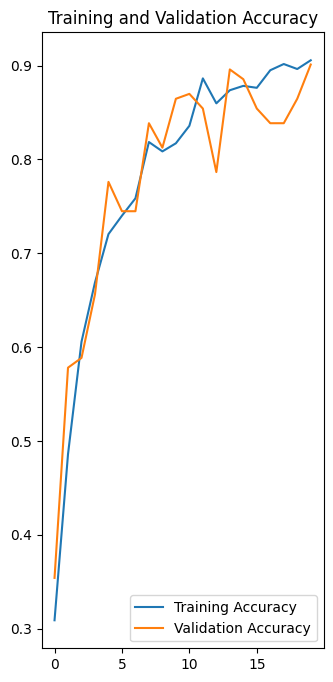

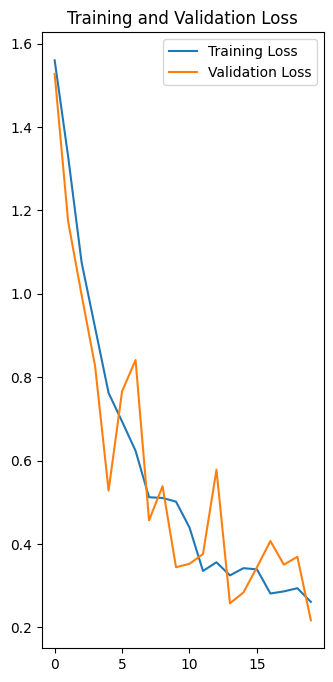

In [21]:
EPOCHS=20

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), accuracy, label='Training Accuracy')
plt.plot(range(EPOCHS), val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.figure(figsize=(8,8))
plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

### Prediction on Sample image

first image to predict
actual label:  Tomato_Bacterial_spot
1/1 [==============================] - 2s 2s/step
predicted label:  Tomato_Early_blight


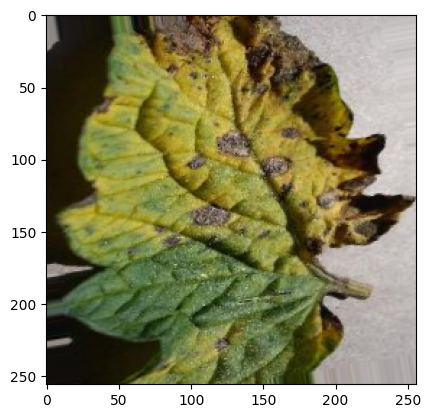

In [22]:
for images_batch, labels_batch in test_datagen:
    first_image = image_batch[0]
    first_label = int(labels_batch[0])

    print('first image to predict')
    plt.imshow(first_image)
    print('actual label: ',class_names[first_label])

    batch_prediction = model.predict(image_batch)
    print('predicted label: ',class_names[np.argmax(batch_prediction[0])])

    break

### Function for Inference

In [23]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array,0)

    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

### Running inference on few images

1/1 [==============================] - 0s 63ms/step


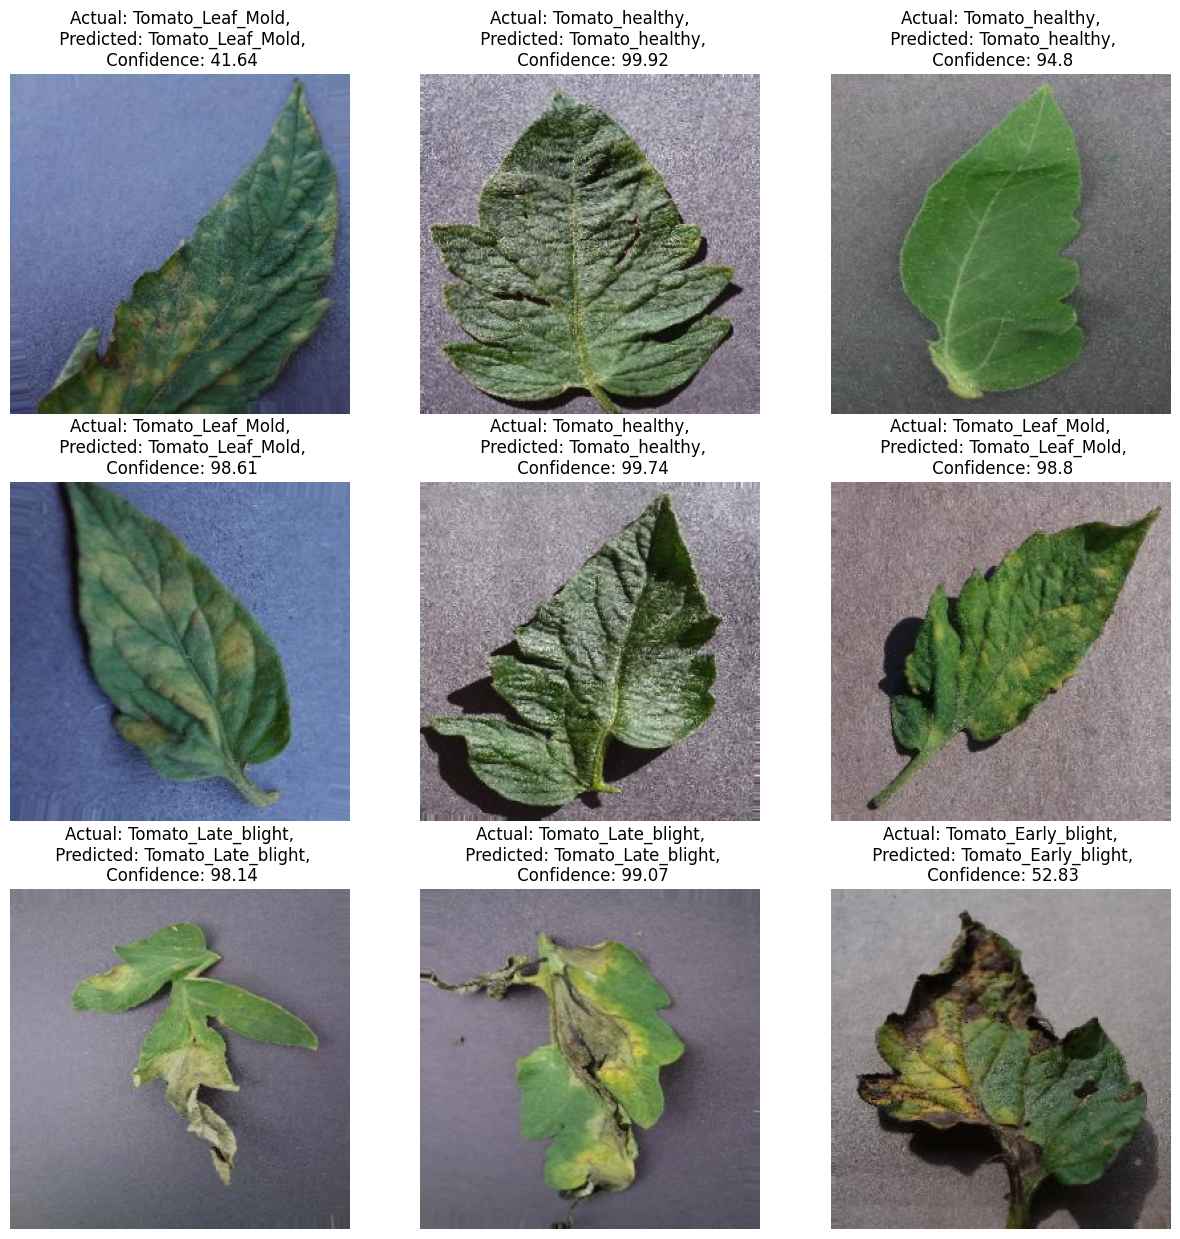

In [24]:
plt.figure(figsize=(15,15))
for images, labels in test_datagen:
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i])
        predicted_class , confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])]
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class},\n Confidence: {confidence}")
        plt.axis('off')

    break

### Save the model

In [25]:
model.save("../potatoes_1.h5")